In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as str
import glob

files = glob.glob('states*.csv')
data = [pd.read_csv(f) for f in files]
us_census = pd.concat(data)
print(us_census.head())

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

In [32]:
us_census.Income = us_census.Income.replace('\$', '', regex=True)
pop_split = us_census.GenderPop.str.split('_', expand=True)
us_census['Men'] = pop_split[0].str.strip('M')
us_census['Women'] = pop_split[1].str.strip('F')
us_census = us_census.drop(['GenderPop', 'Unnamed: 0'], axis=1)

us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)
us_census.Income = pd.to_numeric(us_census.Income)

us_census.fillna(value={'Women': us_census.TotalPop - us_census.Men}, inplace=True)
us_census.Women = pd.to_numeric(us_census.Women, downcast='integer')

us_census = us_census.drop_duplicates()
# print(us_census.duplicated())
print(us_census.dtypes)

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income      float64
Men           int64
Women         int32
dtype: object


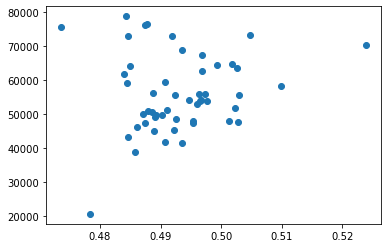

In [33]:
plt.scatter(us_census.Men / us_census.TotalPop, us_census.Income)
plt.show()
plt.close()

In [34]:
us_census.Hispanic = us_census.Hispanic.str.strip('%')
us_census.White = us_census.White.str.strip('%')
us_census.Black = us_census.Black.str.strip('%')
us_census.Native = us_census.Native.str.strip('%')
us_census.Asian = us_census.Asian.str.strip('%')
us_census.Pacific = us_census.Pacific.str.strip('%')

us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
print(us_census.dtypes)

us_census.fillna(value={'Pacific': 0}, inplace=True)
# print(us_census.isna().any())

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men           int64
Women         int32
dtype: object


In [36]:
us_census_melt = us_census.melt(id_vars=['State', 'TotalPop', 'Income', 'Men', 'Women'],
                                value_vars=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
                                var_name='Race', value_name='RacePerc').sort_values('State')
print(us_census_melt.head())

       State  TotalPop        Income      Men    Women      Race   RacePerc
0    Alabama   4830620  43296.358603  2341093  2489527  Hispanic   3.751616
102  Alabama   4830620  43296.358603  2341093  2489527     Black  31.252976
153  Alabama   4830620  43296.358603  2341093  2489527    Native   0.453231
204  Alabama   4830620  43296.358603  2341093  2489527     Asian   1.050255
255  Alabama   4830620  43296.358603  2341093  2489527   Pacific   0.034354


In [39]:
race_means = us_census_melt.groupby('Race').RacePerc.mean().reset_index().sort_values('RacePerc', ascending=False)
print(race_means)

### Another option to make sorted bars
# means = [us_census.iloc[:, x].mean() for x in range(2,8)]
# labels = [us_census.columns[x] for x in range(2,8)]
# sort_list = list(zip(means, labels))
# sort_list.sort(reverse=True)
# means = [x[0] for x in sort_list]
# labels = [x[1] for x in sort_list]

       Race   RacePerc
5     White  67.260478
2  Hispanic  12.648577
1     Black  11.944896
0     Asian   3.644623
3    Native   1.548132
4   Pacific   0.282461


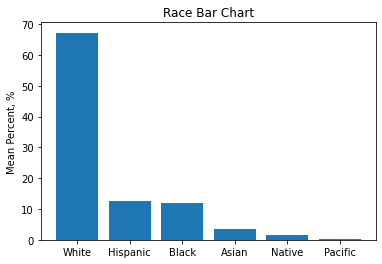

In [40]:
means = race_means.RacePerc
labels = race_means.Race

x = range(len(labels))

fig, ax = plt.subplots()
plt.bar(x, means)
ax.set_ylabel('Mean Percent, %')
ax.set_title('Race Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()
plt.close()

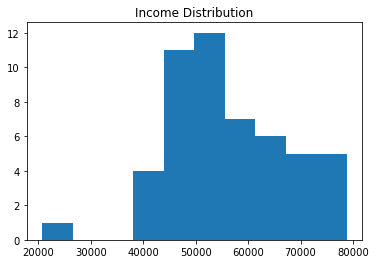

In [41]:
fig, ax = plt.subplots()
plt.hist(us_census.Income)
# plt.xticks(bins)
ax.set_title('Income Distribution')
plt.show()
plt.close()

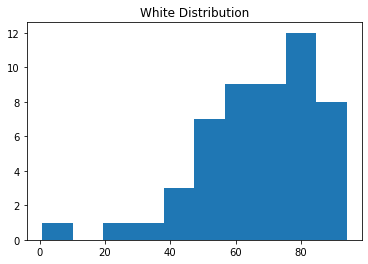

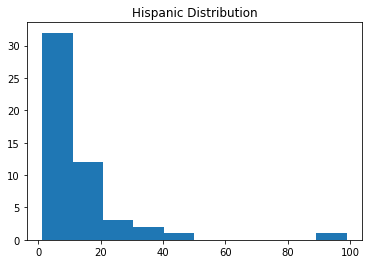

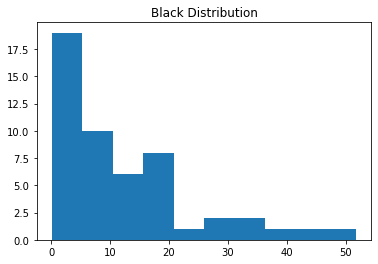

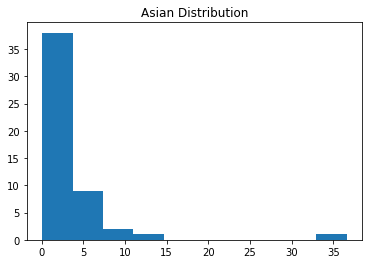

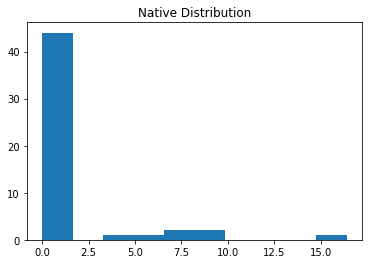

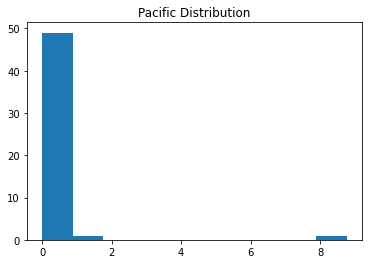

In [42]:
fig, ax = plt.subplots()
plt.hist(us_census.White)
ax.set_title('White Distribution')
plt.show()
plt.close()

fig, ax = plt.subplots()
plt.hist(us_census.Hispanic)
ax.set_title('Hispanic Distribution')
plt.show()
plt.close()

fig, ax = plt.subplots()
plt.hist(us_census.Black)
ax.set_title('Black Distribution')
plt.show()
plt.close()

fig, ax = plt.subplots()
plt.hist(us_census.Asian)
ax.set_title('Asian Distribution')
plt.show()
plt.close()

fig, ax = plt.subplots()
plt.hist(us_census.Native)
ax.set_title('Native Distribution')
plt.show()
plt.close()

fig, ax = plt.subplots()
plt.hist(us_census.Pacific)
ax.set_title('Pacific Distribution')
plt.show()
plt.close()
